In [2]:
import pandas as pd

### Import Data

In [162]:
neighborhood_data = pd.read_csv("../../data/reddit/gpt_sentiment_with_neighborhoods_split.csv")
neighborhood_data.head()

,comment_id,submission_id,comment_text,year,month,sentiment_score,neighborhoods_mentioned,thread_text,tenleytown,columbia heights,...,mount pleasant,capitol hill,se,eotr,west end,woodley park,anacostia,shaw,south east,north east
0,jadkvdl,11e8jyj,yep. i've seen more go down at stores in sw an...,2023,2,4,"navy yard, sw",NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
1,gzixvn7,nljeif,my office is located in noma and we received a...,2021,5,3,noma,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
2,gzixppj,nljeif,"i mean, noma has been like this for a while. a...",2021,5,2,noma,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
3,gzjrh9w,nljeif,i recently moved to noma this year so i wouldn...,2021,5,3,noma,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
4,gzjfj9w,nljeif,"been in noma for 3 years, and it's definitely ...",2021,5,3,noma,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
neighborhood_data.shape

(4067, 44)

### Get Top Mentioned Neighborhoods 

In [164]:
neighborhood_data_ONLY = neighborhood_data[neighborhood_data.columns[7:]]
neighborhood_data_ONLY.head()

,thread_text,tenleytown,columbia heights,ne,navy yard,dupont,ch,georgetown,se,the palisades,...,mount pleasant,capitol hill,se,eotr,west end,woodley park,anacostia,shaw,south east,north east
0,NaN,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
neighborhood_totals = neighborhood_data_ONLY.iloc[:, 1:].sum()  # Exclude the first column if it's not numeric
top_15 = neighborhood_totals.sort_values(ascending=False)[0:15]
top_15

navy yard           649
noma                648
u street            530
columbia heights    518
dupont              498
h street            342
petworth            321
capitol hill        307
shaw                300
adams morgan        287
logan circle        269
georgetown          266
anacostia           228
downtown            215
takoma              164
dtype: int64

In [166]:
cols_to_keep = list(neighborhood_data.columns[:7]) + list(top_15.index)
top_15_df = neighborhood_data[cols_to_keep]
top_15_df.head()

,comment_id,submission_id,comment_text,year,month,sentiment_score,neighborhoods_mentioned,navy yard,noma,u street,...,h street,petworth,capitol hill,shaw,adams morgan,logan circle,georgetown,anacostia,downtown,takoma
0,jadkvdl,11e8jyj,yep. i've seen more go down at stores in sw an...,2023,2,4,"navy yard, sw",1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,gzixvn7,nljeif,my office is located in noma and we received a...,2021,5,3,noma,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,gzixppj,nljeif,"i mean, noma has been like this for a while. a...",2021,5,2,noma,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,gzjrh9w,nljeif,i recently moved to noma this year so i wouldn...,2021,5,3,noma,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,gzjfj9w,nljeif,"been in noma for 3 years, and it's definitely ...",2021,5,3,noma,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Analyis Per Neighborhood

In [167]:
# Check out the overall sentiment stats for each top neighborhood

average_sentiments = []

for i,neighborhood in enumerate(top_15.index):
    
    avg_s = top_15_df[top_15_df[neighborhood] == 1]['sentiment_score'].mean()
    max_s = top_15_df[top_15_df[neighborhood] == 1]['sentiment_score'].max()
    min_s = top_15_df[top_15_df[neighborhood] == 1]['sentiment_score'].min()
    range_s = max_s - min_s

    average_sentiments.append([neighborhood,avg_s,max_s,min_s,range_s])
    
average_sentiments_df = pd.DataFrame(average_sentiments,columns=["neighborhood","avg_sentiment","max_sentiment","min_sentiment","range_sentiment"])
average_sentiments_df

,neighborhood,avg_sentiment,max_sentiment,min_sentiment,range_sentiment
0,navy yard,4.226502,9,1,8
1,noma,4.470679,10,1,9
2,u street,4.373585,10,1,9
3,columbia heights,4.266409,10,1,9
4,dupont,5.090361,10,1,9
5,h street,4.540936,9,1,8
6,petworth,4.000000,9,1,8
7,capitol hill,5.003257,10,1,9
8,shaw,4.573333,10,1,9
9,adams morgan,4.498258,9,1,8


In [168]:
# Average Sentiments by year for each neighborhood

avg = []

for neighborhood in top_15.index:

    neighborhood_data = top_15_df[top_15_df[neighborhood] == 1]

    for year in neighborhood_data["year"].unique():

        year_data = neighborhood_data[neighborhood_data["year"] == year]

        for month in year_data["month"].unique():

            month_data = year_data[year_data["month"] == month]

            avg_s = month_data["sentiment_score"].mean()

            avg.append([neighborhood,month,year,avg_s])

average_sentiments_by_month = pd.DataFrame(avg, columns= ["neighborhood","month","year","average_sentiment"])
average_sentiments_by_month

,neighborhood,month,year,average_sentiment
0,navy yard,2,2023,4.000000
1,navy yard,3,2023,5.456140
2,navy yard,11,2023,3.773810
3,navy yard,9,2023,3.500000
4,navy yard,4,2023,3.000000
...,...,...,...,...
522,takoma,8,2021,3.000000
523,takoma,11,2021,7.000000
524,takoma,5,2014,4.000000
525,takoma,8,2014,6.444444


In [169]:
average_sentiment_by_year = average_sentiments_by_month.groupby(["neighborhood","year"]).mean().drop("month",axis=1).reset_index()
average_sentiment_by_year

,neighborhood,year,average_sentiment
0,adams morgan,2010,5.750000
1,adams morgan,2012,5.000000
2,adams morgan,2016,7.000000
3,adams morgan,2018,6.166667
4,adams morgan,2019,5.666667
...,...,...,...
138,u street,2019,3.825000
139,u street,2021,4.891582
140,u street,2022,8.000000
141,u street,2023,4.322546


In [170]:
# convert date to date
average_sentiments_by_month['date'] = pd.to_datetime(average_sentiments_by_month['year'].astype(str) + '-' + average_sentiments_by_month['month'].astype(str))
average_sentiments_by_month.head()

,neighborhood,month,year,average_sentiment,date
0,navy yard,2,2023,4.00000,2023-02-01
1,navy yard,3,2023,5.45614,2023-03-01
2,navy yard,11,2023,3.77381,2023-11-01
3,navy yard,9,2023,3.50000,2023-09-01
4,navy yard,4,2023,3.00000,2023-04-01


In [248]:
from plotnine import * 

plot = (ggplot(data = average_sentiments_by_month) +
 
  geom_boxplot(aes(x='neighborhood', y='average_sentiment')) + 
  labs(x="Neighborhood", y="Average Safety Sentiment", title="Average Safety Sentiment by Neighborhood", color="Neighborhood") +
  theme_minimal(base_size=8) +
  theme(axis_text_x=element_text(rotation=90)) 

 )

plot.draw()

plot.save("../../figures/sentiment_by_neighborhood_box.png", dpi=300)

/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: ../../figures/sentiment_by_neighborhood_box.png


### Get only last 5 years, and fill missing years with Nan

In [179]:
average_sentiments_by_year_2019 = average_sentiments_by_year[average_sentiments_by_year["year"] >= 2019]
average_sentiments_by_year_2019

NameError: name 'average_sentiments_by_year' is not defined

In [279]:
all_years = range(average_sentiments_by_year_2019['year'].min(), average_sentiments_by_year_2019['year'].max() + 1)
all_years

range(2019, 2025)

In [280]:
expanded_df = (
    average_sentiments_by_year_2019.set_index(['neighborhood', 'year'])  # Set multi-index
      .reindex(pd.MultiIndex.from_product(
          [average_sentiments_by_year_2019['neighborhood'].unique(), all_years], names=['neighborhood', 'year']
      ))                                   # Reindex to add missing combinations
      .reset_index()                       # Reset index to get a flat dataframe
)

# Fill missing `average_sentiment` with None
expanded_df['average_sentiment'] = expanded_df['average_sentiment'].where(pd.notna(expanded_df['average_sentiment']), None)

In [281]:
expanded_df

,neighborhood,year,average_sentiment
0,navy yard,2019,5.000000
1,navy yard,2020,NaN
2,navy yard,2021,5.444444
3,navy yard,2022,5.566667
4,navy yard,2023,4.200957
...,...,...,...
85,takoma,2020,4.000000
86,takoma,2021,6.571429
87,takoma,2022,5.533333
88,takoma,2023,3.826923


### Zillow Data

In [186]:
home_prices = pd.read_csv("../../data/zillow_house_values.csv")
home_prices

,RegionName,State,City,EndMonth,MedianHomeValue
0,Columbia Heights,DC,Washington,2019-01-31,599525.939267
1,Capitol Hill,DC,Washington,2019-01-31,819029.545400
2,Petworth,DC,Washington,2019-01-31,593648.793579
3,Adams Morgan,DC,Washington,2019-01-31,548296.629400
4,Shaw,DC,Washington,2019-01-31,757805.290735
...,...,...,...,...,...
518,Adams Morgan,DC,Washington,2024-10-31,581161.059991
519,Shaw,DC,Washington,2024-10-31,779773.578514
520,Navy Yard,DC,Washington,2024-10-31,669250.473366
521,NoMa,DC,Washington,2024-10-31,461919.845801


In [187]:
home_prices['EndMonth'] = pd.to_datetime(home_prices['EndMonth'])
home_prices['EndMonth'] = home_prices['EndMonth'].apply(lambda x: x.replace(day=1))

In [188]:
home_prices

,RegionName,State,City,EndMonth,MedianHomeValue
0,Columbia Heights,DC,Washington,2019-01-01,599525.939267
1,Capitol Hill,DC,Washington,2019-01-01,819029.545400
2,Petworth,DC,Washington,2019-01-01,593648.793579
3,Adams Morgan,DC,Washington,2019-01-01,548296.629400
4,Shaw,DC,Washington,2019-01-01,757805.290735
...,...,...,...,...,...
518,Adams Morgan,DC,Washington,2024-10-01,581161.059991
519,Shaw,DC,Washington,2024-10-01,779773.578514
520,Navy Yard,DC,Washington,2024-10-01,669250.473366
521,NoMa,DC,Washington,2024-10-01,461919.845801


## Plot!

In [175]:
from plotnine import * 
import matplotlib.pyplot as plt

In [176]:
admo = average_sentiment_by_year[average_sentiment_by_year["neighborhood"] == "adams morgan"]
#admo = admo[admo["year"] >= 2019]
admo

,neighborhood,year,average_sentiment
0,adams morgan,2010,5.750000
1,adams morgan,2012,5.000000
2,adams morgan,2016,7.000000
3,adams morgan,2018,6.166667
4,adams morgan,2019,5.666667
5,adams morgan,2021,5.775000
6,adams morgan,2022,3.750000
7,adams morgan,2023,4.893519
8,adams morgan,2024,4.875923


In [177]:
admo_prices = home_prices[home_prices["RegionName"] == "Adams Morgan"]
admo_prices

,RegionName,State,City,EndMonth,MedianHomeValue
3,Adams Morgan,DC,Washington,2019-01-01,548296.629400
10,Adams Morgan,DC,Washington,2019-02-01,547969.183600
17,Adams Morgan,DC,Washington,2019-03-01,547475.679639
24,Adams Morgan,DC,Washington,2019-04-01,547781.610178
31,Adams Morgan,DC,Washington,2019-05-01,548881.525561
...,...,...,...,...,...
486,Adams Morgan,DC,Washington,2024-06-01,581452.281209
494,Adams Morgan,DC,Washington,2024-07-01,579612.351904
502,Adams Morgan,DC,Washington,2024-08-01,578123.410176
510,Adams Morgan,DC,Washington,2024-09-01,579435.486200


In [178]:
admo['year'] = pd.to_numeric(admo['year'], errors='coerce')  # Convert to numeric
admo_prices['EndMonth'] = pd.to_numeric(admo_prices['EndMonth'], errors='coerce')  # Convert to numeric


/var/folders/5c/d2k1t24s5zl213152tpfh6nh0000gn/T/ipykernel_42113/1540003029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/var/folders/5c/d2k1t24s5zl213152tpfh6nh0000gn/T/ipykernel_42113/1540003029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
(ggplot(data = admo) +
 
  geom_point(aes(x='year', y='average_sentiment')) + 
 
 geom_smooth(aes(x="year", y="average_sentiment"), method = 'loess', se=False)
 
 )
 

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1336809828.py, line 3)

In [147]:
admo_prices['EndMonth'] = pd.to_datetime(admo_prices['EndMonth'])

/var/folders/5c/d2k1t24s5zl213152tpfh6nh0000gn/T/ipykernel_42113/2649583443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


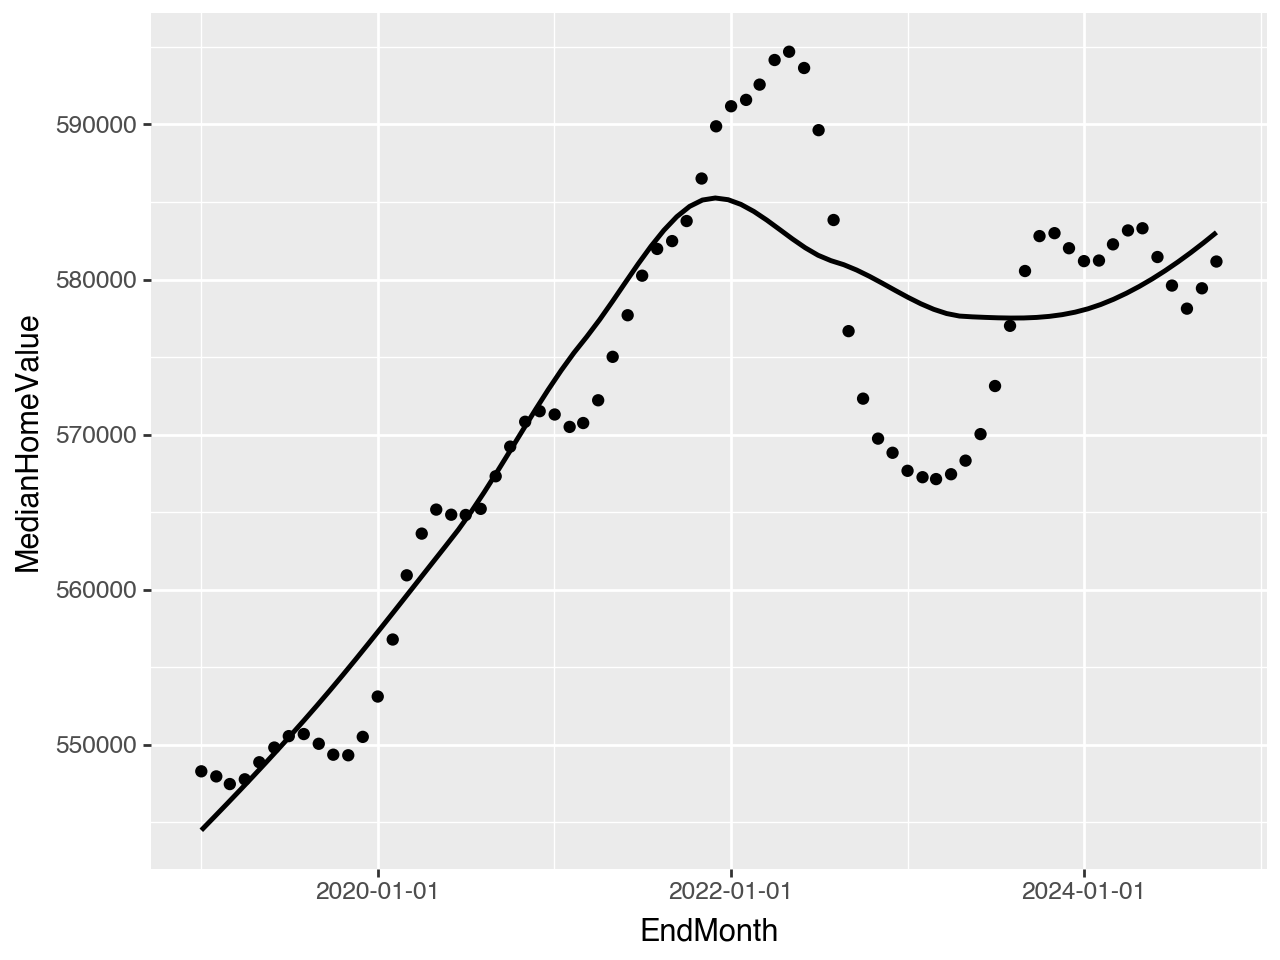

In [158]:
import matplotlib.dates as mdates

(ggplot(data = admo_prices) +
 
 geom_point(aes(x="EndMonth", y="MedianHomeValue")) + 
 
 geom_smooth(aes(x="EndMonth", y="MedianHomeValue"), method = 'loess', se=False)  
 
)

### Test

In [353]:
import matplotlib.pyplot as plt

In [220]:
home_prices["RegionName"].unique()

array(['Columbia Heights', 'Capitol Hill', 'Petworth', 'Adams Morgan',
       'Shaw', 'Navy Yard', 'Anacostia', 'NoMa'], dtype=object)

In [253]:
navy_yard_price = home_prices[home_prices["RegionName"] == "Anacostia"]
navy_yard_price

,RegionName,State,City,EndMonth,MedianHomeValue
6,Anacostia,DC,Washington,2019-01-01,328340.581691
13,Anacostia,DC,Washington,2019-02-01,330230.305800
20,Anacostia,DC,Washington,2019-03-01,332862.390600
27,Anacostia,DC,Washington,2019-04-01,336980.572990
34,Anacostia,DC,Washington,2019-05-01,339914.699670
...,...,...,...,...,...
490,Anacostia,DC,Washington,2024-06-01,390977.338084
498,Anacostia,DC,Washington,2024-07-01,388823.816129
506,Anacostia,DC,Washington,2024-08-01,387161.997291
514,Anacostia,DC,Washington,2024-09-01,387542.543291


In [254]:
navy_yard_sentiment = average_sentiments_by_month[average_sentiments_by_month["neighborhood"] == "anacostia"]
navy_yard_sentiment

,neighborhood,month,year,average_sentiment,date
442,anacostia,3,2023,6.500000,2023-03-01
443,anacostia,10,2023,3.272727,2023-10-01
444,anacostia,9,2023,3.277778,2023-09-01
445,anacostia,5,2023,3.575758,2023-05-01
446,anacostia,4,2023,3.238095,2023-04-01
447,anacostia,8,2023,3.466667,2023-08-01
448,anacostia,8,2012,5.750000,2012-08-01
449,anacostia,4,2015,7.000000,2015-04-01
450,anacostia,3,2024,2.000000,2024-03-01
451,anacostia,4,2024,4.500000,2024-04-01


In [256]:
merged_df = navy_yard_price.merge(navy_yard_sentiment,left_on="EndMonth",right_on="date", how='inner')
merged_df

,RegionName,State,City,EndMonth,MedianHomeValue,neighborhood,month,year,average_sentiment,date
0,Anacostia,DC,Washington,2021-03-01,414487.849155,anacostia,3,2021,6.000000,2021-03-01
1,Anacostia,DC,Washington,2021-04-01,419366.566080,anacostia,4,2021,3.000000,2021-04-01
2,Anacostia,DC,Washington,2023-03-01,398259.902407,anacostia,3,2023,6.500000,2023-03-01
3,Anacostia,DC,Washington,2023-04-01,398176.150655,anacostia,4,2023,3.238095,2023-04-01
4,Anacostia,DC,Washington,2023-05-01,398920.739357,anacostia,5,2023,3.575758,2023-05-01
5,Anacostia,DC,Washington,2023-08-01,401528.775927,anacostia,8,2023,3.466667,2023-08-01
6,Anacostia,DC,Washington,2023-09-01,400715.059636,anacostia,9,2023,3.277778,2023-09-01
7,Anacostia,DC,Washington,2023-10-01,398500.832843,anacostia,10,2023,3.272727,2023-10-01
8,Anacostia,DC,Washington,2024-01-01,392838.862003,anacostia,1,2024,3.800000,2024-01-01
9,Anacostia,DC,Washington,2024-02-01,392657.689965,anacostia,2,2024,8.000000,2024-02-01


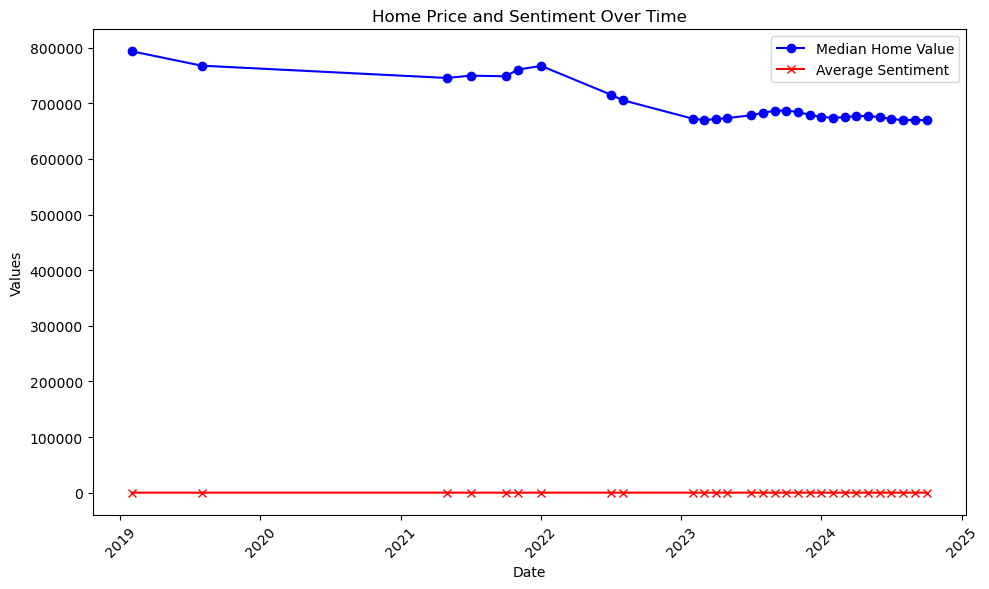

In [195]:
plt.figure(figsize=(10, 6))

# Plot Home Price
plt.plot(merged_df['EndMonth'], merged_df['MedianHomeValue'], label='Median Home Value', color='b', marker='o')

# Plot Sentiment
plt.plot(merged_df['date'], merged_df['average_sentiment'], label='Average Sentiment', color='r', marker='x')

# Labels and Title
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Home Price and Sentiment Over Time')
plt.legend()

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [160]:
import numpy as np

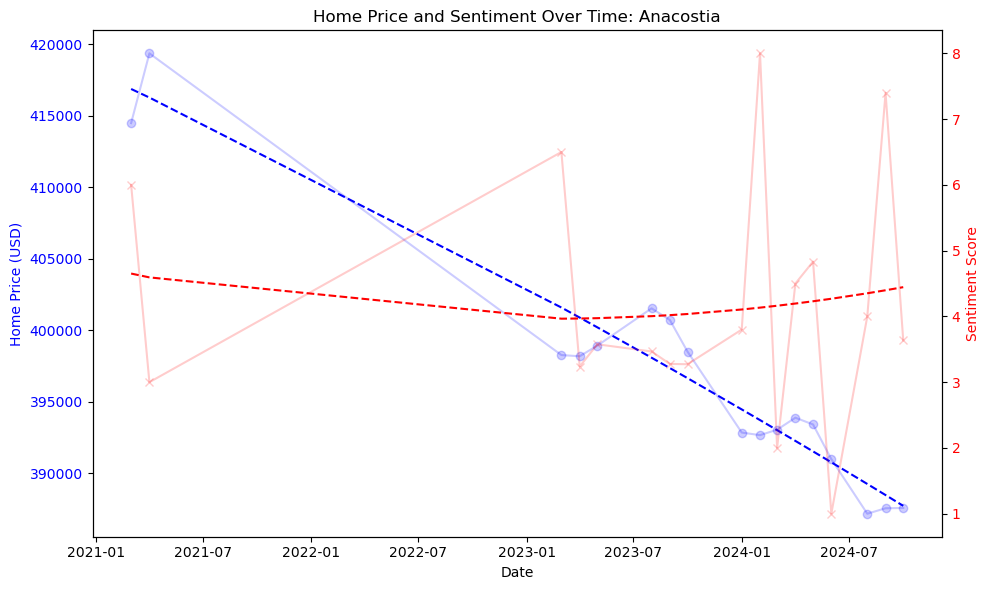

In [257]:
fig, ax1 = plt.subplots(figsize=(10, 6))

degree=2

# Plot Home Price (on the left y-axis)
ax1.plot(merged_df['EndMonth'], merged_df['MedianHomeValue'], color='b', marker='o', label='Median Home Value', alpha=.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('Home Price (USD)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

coeff_hp = np.polyfit(merged_df['EndMonth'].astype(np.int64), merged_df['MedianHomeValue'], degree)
poly_hp = np.poly1d(coeff_hp)  # Create the polynomial function
ax1.plot(merged_df['EndMonth'], poly_hp(merged_df['EndMonth'].astype(np.int64)), 
         color='b', linestyle='--', label=f'Home Price Polynomial Fit (degree {degree})')

# Create a secondary y-axis for sentiment
ax2 = ax1.twinx()  # This creates a second y-axis sharing the same x-axis
ax2.plot(merged_df['date'], merged_df['average_sentiment'], color='r', marker='x', label='Average Sentiment', alpha=.2)
ax2.set_ylabel('Sentiment Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

coeff_sent = np.polyfit(merged_df['date'].astype(np.int64), merged_df['average_sentiment'], degree)
poly_sent = np.poly1d(coeff_sent)  # Create the polynomial function
ax2.plot(merged_df['date'], poly_sent(merged_df['date'].astype(np.int64)), 
         color='r', linestyle='--', label=f'Sentiment Polynomial Fit (degree {degree})')

# Add a title and a legend
plt.title('Home Price and Sentiment Over Time: Anacostia')

# Show the plot
fig.tight_layout()
plt.savefig("../../figures/anacostia_HomePrice_vs_Sentiment.png", transparent=True)
plt.show()


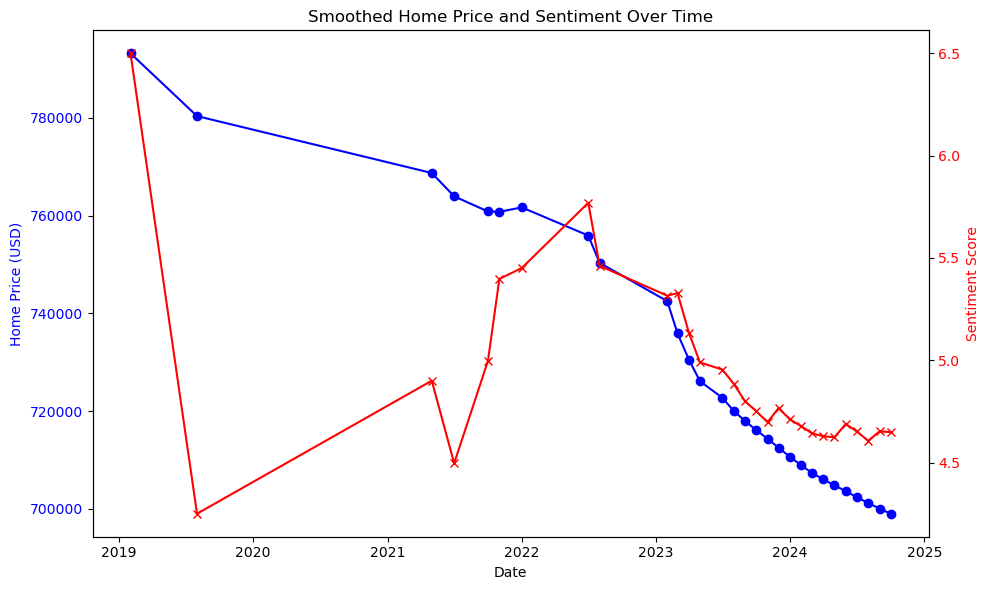

In [ ]:
# Apply a moving average to smooth the lines (adjust window size as needed)
window_size = 1000  # You can adjust the window size to control the smoothing level

# Smooth the Home Price data
merged_df['smoothed_home_value'] = merged_df['MedianHomeValue'].rolling(window=window_size, min_periods=1).mean()

# Smooth the Sentiment data
merged_df['smoothed_sentiment'] = merged_df['average_sentiment'].rolling(window=window_size, min_periods=1).mean()

# Plot Home Price (on the left y-axis)
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(merged_df['EndMonth'], merged_df['smoothed_home_value'], color='b', marker='o', label='Smoothed Home Value')
ax1.set_xlabel('Date')
ax1.set_ylabel('Home Price (USD)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis for sentiment
ax2 = ax1.twinx()
ax2.plot(merged_df['date'], merged_df['smoothed_sentiment'], color='r', marker='x', label='Smoothed Sentiment')
ax2.set_ylabel('Sentiment Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and a legend
plt.title('Smoothed Home Price and Sentiment Over Time')

# Show the plot
fig.tight_layout()
plt.show()